## <center> INTRACRANIAL HEMORRHAGES DATABASE - DIMENSIONALITY REDUCTION - PCA & FA</center>

This Notebook explores some dimensionality reduction techniques, including **Principal Component Analysis (PCA)** and **Factorial Analysis (FA)**. PCA is more appropriate for quantitative data, nevertheless, FA allows to analyze a dataset with numerical and categorical variables. 

**1. Load dataset**

**2. Principal Component Analysis (PCAs)**

**3. Factorial Analysis (FA)**

### Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis
import matplotlib.pyplot as plt
import seaborn as sns

### Configuration of the enviroment

In [2]:
np.set_printoptions(suppress=True) # Print decimal notation instead of scientific notation

### 1. Load dataset

In [3]:
df= pd.read_hdf('Databases/ICH_database.hdf5')
df_metadata= pd.read_csv('Databases/ICH_database_metadata.csv')
df.head(4)

,patient,sex,hospital,follow_up,final_outcome,nfamily_medhist,tobacco,n_tobacco,drugs,alcohol,...,rdw,mchc,mpv,mch,inr,fibrinogen,maxfibrinogen,time_between_CT_bloodanalysis,age,survival_days
0,1,1,1.0,2.0,2.0,17,2.0,NaN,0,0,...,17.0,33.0,9.0,28.1,4.21,344.0,618.0,0,74,4
1,2,2,2.0,0.0,1.0,4,0.0,0.0,0,0,...,14.7,32.5,10.7,29.8,NaN,NaN,1081.0,0,81,2128
2,3,2,1.0,0.0,0.0,8,0.0,0.0,0,0,...,14.0,33.1,8.7,30.1,3.16,298.0,470.0,0,78,2388
3,4,2,1.0,2.0,2.0,8,0.0,0.0,0,0,...,15.8,34.1,7.6,19.3,1.09,344.0,344.0,0,79,7


In [4]:
# Explore outcomes (hospitalization days will be considered as a predictor)
outcomes= df_metadata[df_metadata['Type_of_Variable'] == 'Outcome']['Variable_Label'].values.tolist()
outcomes

['follow_up',
 'final_outcome',
 'survival_discharge',
 'survival_3d',
 'survival_6d',
 'survival_9d',
 'survival_12d',
 'survival_15d',
 'survival_1m',
 'survival_3m',
 'survival_1y',
 'survival_5y',
 'survived',
 'neurosurg',
 'interprocedures',
 'survival_days']

In [5]:
# Selection of some predictors to have enought sample after removing NaNs
predictors= ['sex','nfamily_medhist', 'ht', 'dmellitus', 'dyslipidemia', 'structural_heart_disease',
             'neurological_diseases',
             'antihypertensives', 'antidiabetics', 'hypolipidemics', 'anticoagulants', 'antiplatelets',
             'aspirin', 'cumarinics',
             'headache', 'emesis', 'visual_disturbances', 'seizures',
             'neurol_signs', 'anisocoria', 'altered_consciousness',
             'ruplimb_mimpairment', 'luplimb_mimpairment', 'rlwlimb_mimpairment', 'llwlimb_mimpairment',
             'balance_impairment', 'tgcs', 'onset_h',
             'primary_ich',
             'glucose', 'urea', 'creatinine', 'potasium', 'prothrombin_activity', 'hematocrit', 'maxfibrinogen',
             'age']

In [6]:
df_X= df[predictors]
df_y= df[outcomes]

### 2. Principal Component Analysis (PCAs)

In Machine Learning, **Principal Component Analysis (PCA)** is a technique used to reduce the dimensionality of a dataset and used to eliminate variables correlations. These two aims are very important when training Machine Learning algorithms. **Dimensionality reduction** brings less computational cost, less over-fitting, and less spurious correlations. **Elimination of variables correlations (multicollinearity)** is also very for some algorithms, like regressions, where multicollinearity artefacts the variable contributibution to the final result.

The result of a PCA is the description of the dataset in terms of new, uncorrelated variables, called **components**. The components are ordered by the amount of original variance they describe. It converts a dataset of correlated variables into a dataset of nonlinearly correlated variables called principal components, by searching for the projection which best represents the data in terms of least squares.

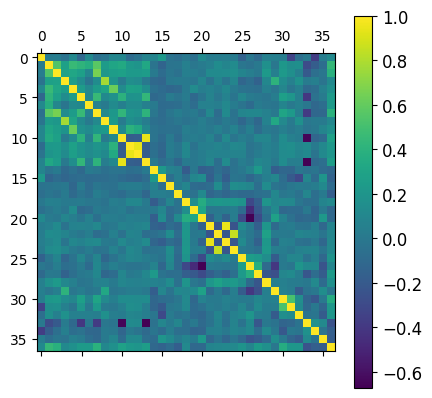

In [7]:
# Visualization of dataset correlations
fig1= plt.matshow(df_X.corr(method='spearman'))
cb= plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.show()

Before starting a PCA, data standardization is a must.

In [8]:
# Standarization of the variables to avoid scale problems
scaler= StandardScaler()

# Separete quantitatives and qualitatives
quantitatives= [variable for variable in df_X.columns.tolist() if df_X[variable].dtype in ('int64','float64')]
df_X_quant= df_X[quantitatives]
df_X_qual= df_X[list(set(df_X.columns.tolist()) - set(quantitatives))]

# Standarize quantitatives
X_quant_std= scaler.fit_transform(df_X_quant)
df_X_quant_std= pd.DataFrame(data=X_quant_std, columns=df_X_quant.columns.to_list())

# Concatenate quantitatives standarized and qualitatives
df_X_std= pd.concat([df_X_quant_std, df_X_qual], axis=1)

# Remove NaN
df_X_std_nonan= df_X_std.dropna(axis=0)
df_X_std_nonan.shape

(129, 37)

In [9]:
# PCA
data= df_X_std_nonan
n_components= data.shape[1]
pca= PCA(n_components=n_components, whiten=True, svd_solver='randomized', random_state=0).fit(data)

print('Variance explained by each component (%):\n\n', np.round(pca.explained_variance_ratio_*100,4), '\n')
print('Variance explained by all components %.1f%%:' % (sum(pca.explained_variance_ratio_)*100))

Variance explained by each component (%):

 [41.2469 12.9787  6.1372  5.6674  4.5013  3.7397  3.3058  3.0562  2.6649
  2.4347  1.9028  1.7453  1.387   1.2205  1.0631  1.0039  0.7778  0.6995
  0.5989  0.4858  0.4667  0.45    0.3882  0.3277  0.2973  0.2719  0.2462
  0.2072  0.1615  0.1441  0.123   0.0942  0.078   0.0523  0.0472  0.017
  0.0101] 

Variance explained by all components 100.0%:


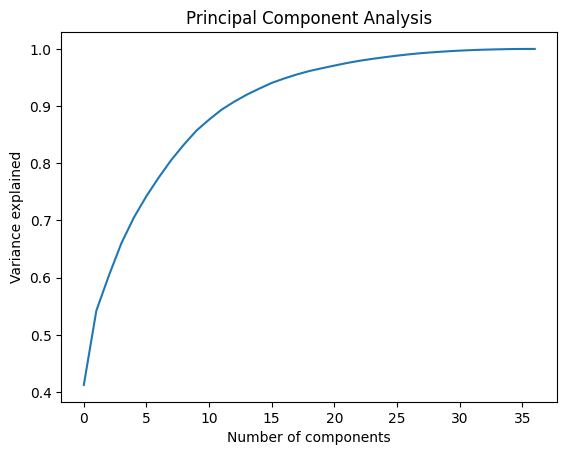

In [10]:
fig2= plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title ('Principal Component Analysis')
plt.xlabel('Number of components')
plt.ylabel('Variance explained')
plt.show()

In [11]:
for i in range(1,len(pca.explained_variance_ratio_)):
    variance= sum(pca.explained_variance_ratio_[:i])*100
    print('Total variance explained by the first %.0f components: %.2f %%' % (i, variance))

Total variance explained by the first 1 components: 41.25 %
Total variance explained by the first 2 components: 54.23 %
Total variance explained by the first 3 components: 60.36 %
Total variance explained by the first 4 components: 66.03 %
Total variance explained by the first 5 components: 70.53 %
Total variance explained by the first 6 components: 74.27 %
Total variance explained by the first 7 components: 77.58 %
Total variance explained by the first 8 components: 80.63 %
Total variance explained by the first 9 components: 83.30 %
Total variance explained by the first 10 components: 85.73 %
Total variance explained by the first 11 components: 87.64 %
Total variance explained by the first 12 components: 89.38 %
Total variance explained by the first 13 components: 90.77 %
Total variance explained by the first 14 components: 91.99 %
Total variance explained by the first 15 components: 93.05 %
Total variance explained by the first 16 components: 94.06 %
Total variance explained by the f

It is possible to plot the first components and explore how different outcomes can be separated by the components.

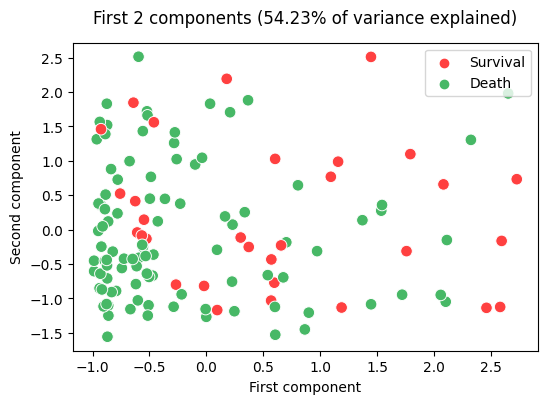

In [12]:
# Visualization of the first two components
pca_values= pca.transform(data)
x_component= 1
y_component= 2

fig3= plt.figure(figsize=(6,4))
sns.scatterplot(x=pca_values[:,x_component-1],
                y=pca_values[:,y_component-1],
                s=70,
                hue=df_y.loc[data.index, 'survival_discharge'],
                palette=['#ff4040', '#47b866'])
plt.title ('First 2 components (54.23% of variance explained)', pad=14)
plt.xlabel('First component')
plt.ylabel('Second component')

leg= plt.legend(loc='upper right')
leg.get_texts()[0].set_text('Survival')
leg.get_texts()[1].set_text('Death')
plt.show()

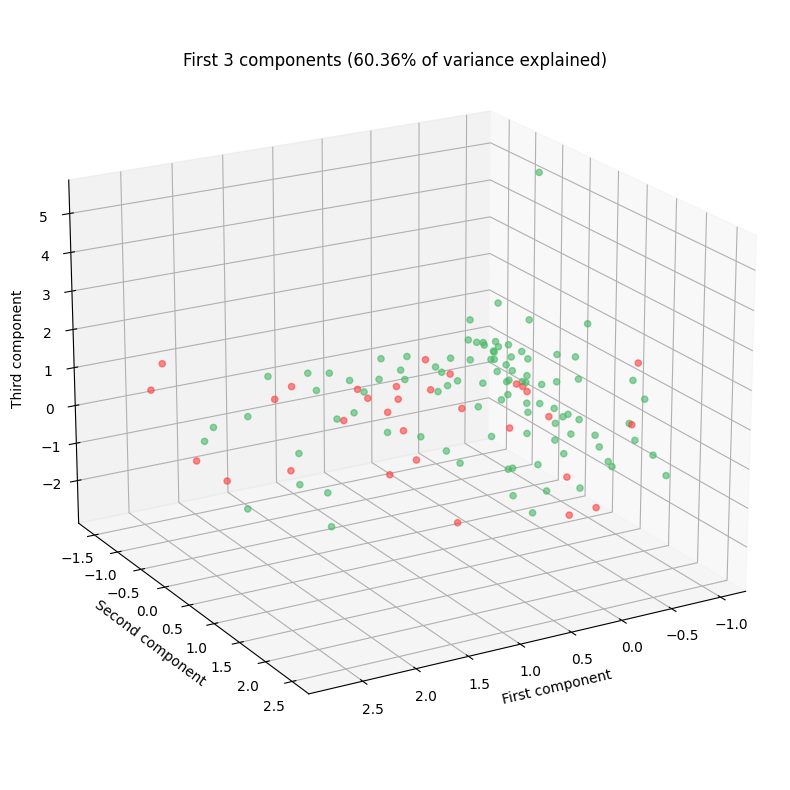

In [13]:
# Visualization of the first three components
x_component= 1
y_component= 2
z_component= 3

fig4= plt.figure(figsize=(10,10))
ax= plt.axes(projection='3d')
sctt= ax.scatter3D(pca_values[:,x_component-1],
                   pca_values[:,y_component-1],
                   pca_values[:,z_component-1],
                   c=['#ff4040' if label == 0 else '#47b866' for label in df_y.loc[data.index, 'survival_discharge']],
                   alpha=0.6)

plt.title(    'First 3 components (60.36% of variance explained)', pad=14, y=0.98)
ax.set_xlabel('First component')
ax.set_ylabel('Second component')

ax.zaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_zlabel('Third component', rotation=90)

ax.view_init(elev=20, azim=60)
plt.show()

### 3. Mutiple Factorial Analysis (FA)

Although PCA can be used for quantitative and qualitative variables, this technique works better for quantitative data. When there are mixed data, other tehniques can be used for dimensionality reduction. **Multiple Factor Analysis (FA)** or **Factorial Analysis of Mixed Data (MD)** is one of those, and it builds a matrix representing the relationships between all the variables in the dataset, covariance matrix for quantitative variables, similar to PCA, and categorical dissimilarities for categorical variables, simlar to **Multiple Correspondence Analysis (MCA)**. Later, directions of the maximized variance for numerical variables and discrimination for categorical variables, are found.

In summary, FA applies PCA on numerical and MCA on categorical variables and combines the results by weighing variable groups. The PCA and FA have different goals, PCA has as a goal to define new variables called *components* based on the highest variance explained and so forth, while FA has as a goal to define new variables called *common factors* that we can understand and interpret.

In [14]:
fa= FactorAnalysis(n_components=n_components, copy=True, max_iter=10, svd_method='randomized', random_state=0).fit(data)

variance= [(100*np.sum(fa.components_**2,axis=1)[i])/np.sum(np.sum(fa.components_**2,axis=1)) for i in range(n_components)]
variance= np.round(-np.sort(-np.array(variance)),4)

print('Variance explained by each component (%):\n\n', variance, '\n')
print('Variance explained by all components %.1f%%:' % (sum(variance)))

Variance explained by each component (%):

 [56.2723 17.2249  6.4787  5.0114  3.3472  2.2058  2.0549  2.0376  1.8891
  1.0418  0.81    0.635   0.4461  0.2663  0.2286  0.0504  0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.    ] 

Variance explained by all components 100.0%:


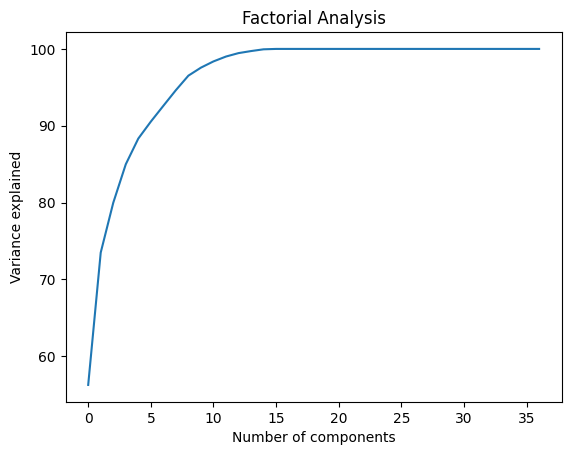

In [15]:
fig5= plt.plot(np.cumsum(variance))
plt.title ('Factorial Analysis')
plt.xlabel('Number of components')
plt.ylabel('Variance explained')
plt.show()

In [16]:
for i in range(n_components):
    print('Total variance explained by the first %.0f components: %.2f %%' % (i, sum(variance[:i])))

Total variance explained by the first 0 components: 0.00 %
Total variance explained by the first 1 components: 56.27 %
Total variance explained by the first 2 components: 73.50 %
Total variance explained by the first 3 components: 79.98 %
Total variance explained by the first 4 components: 84.99 %
Total variance explained by the first 5 components: 88.33 %
Total variance explained by the first 6 components: 90.54 %
Total variance explained by the first 7 components: 92.60 %
Total variance explained by the first 8 components: 94.63 %
Total variance explained by the first 9 components: 96.52 %
Total variance explained by the first 10 components: 97.56 %
Total variance explained by the first 11 components: 98.37 %
Total variance explained by the first 12 components: 99.01 %
Total variance explained by the first 13 components: 99.45 %
Total variance explained by the first 14 components: 99.72 %
Total variance explained by the first 15 components: 99.95 %
Total variance explained by the fir

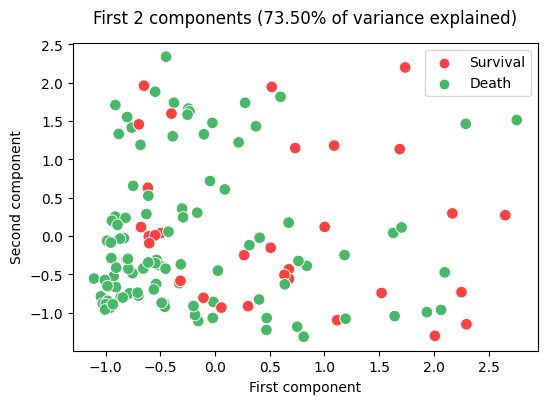

In [17]:
# Visualization of the first two components
fa_values= fa.transform(data)
x_component= 1
y_component= 2

fig3= plt.figure(figsize=(6,4))
sns.scatterplot(x=fa_values[:,x_component-1],
                y=fa_values[:,y_component-1],
                s=70,
                hue=df_y.loc[data.index, 'survival_discharge'],
                palette=['#ff4040', '#47b866'])
plt.title ('First 2 components (73.50% of variance explained)', pad=14)
plt.xlabel('First component')
plt.ylabel('Second component')

leg= plt.legend(loc='upper right')
leg.get_texts()[0].set_text('Survival')
leg.get_texts()[1].set_text('Death')
plt.show()

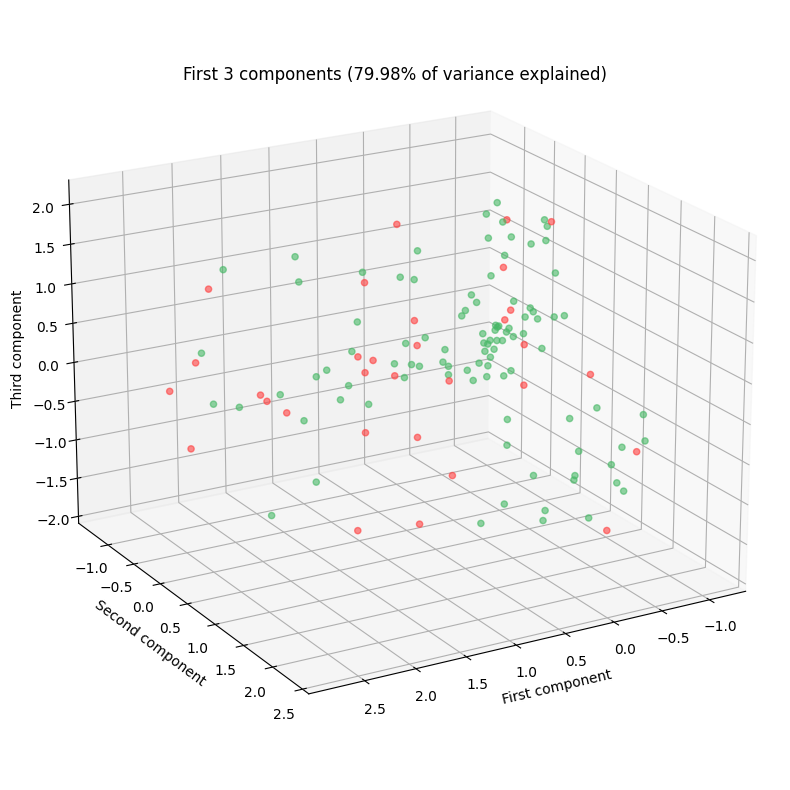

In [18]:
# Visualization of the first three components
x_component= 1
y_component= 2
z_component= 3

fig4= plt.figure(figsize=(10,10))
ax= plt.axes(projection='3d')
sctt= ax.scatter3D(fa_values[:,x_component-1],
                   fa_values[:,y_component-1],
                   fa_values[:,z_component-1],
                   c=['#ff4040' if label == 0 else '#47b866' for label in df_y.loc[data.index, 'survival_discharge']],
                   alpha=0.6)

plt.title(    'First 3 components (79.98% of variance explained)', pad=14, y=0.96)
ax.set_xlabel('First component')
ax.set_ylabel('Second component')

ax.zaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_zlabel('Third component', rotation=90)

ax.view_init(elev=20, azim=60)
plt.show()